**Predmet:** Principi prezentacije i prepoznavanja oblika

**Student:** Aleksandra Vujović IT39/2019


<p align="justify"><b>Segmentacija fotografija</b> je složen proces koji ima za cilj podeliti sliku na diskretne segmente, regije ili kategorije, kako bi se omogućila daljnja analiza ili prepoznavanje oblika. Slika se deli na manje delove koji imaju određene zajedničke karakteristike, što olakšava analizu, interpretaciju i obradu podataka. Ova tehnika omogućava računarima da razumeju strukturu slike na osnovu karakteristika piksela.
Segmentacija fotografija predstavlja ključan korak u oblasti računarske obrade slika, omogućavajući analizu i prepoznavanje oblika, struktura i objekata unutar slika. Ovaj proces ima široku primenu u različitim industrijama i disciplinama, od medicinske dijagnostike do računarskog vida i industrijske automatizacije.

U kontekstu medicinske primene kao što je segmentacija nerava na ultrazvučnim slikama, postižu se brojne koristi.

Segmentacija omogućava medicinskim stručnjacima da precizno identifikuju specifične strukture ili regione na slikama, u ovom slučaju nerve. Ovo je ključno za dalje planiranje tretmana i praćenje promena. Segmentacija olakšava edukaciju medicinskog osoblja tako što im pruža jasne i detaljne prikaze anatomskih struktura. Takođe, ljudska interpretacija slika ponekad može biti subjektivna i varira od slučaja do slučaja. Segmentacija pomaže u smanjenju ovog faktora pružajući objektivne i dosledne rezultate.

**<i>Različite vrste segmentacije:</i>**

Postoje različite vrste segmentacije, a u ovom kontekstu, ističemo <i>**semantičku segmentaciju**</i> i <i>**segmentaciju instance**</i>.

*Semantička segmentacija:*
Semantička segmentacija fokusira se na identifikaciju i izdvajanje regija na slici koje predstavljaju različite objekte ili elemente od interesa. Ova tehnika koristi prag svetline ili intenziteta piksela kako bi razlikovala objekte od pozadine. Time se omogućava razumevanje semantičkog značaja svakog dela slike.

*Segmentacija instance:*
Segmentacija instance koncentriše se na pronalaženje ivica objekata i izdvajanje samo piksela koji pripadaju tim ivicama. Ovaj pristup je koristan kada je potrebno precizno prepoznati pojedinačne instance istog objekta, kao što su više automobila na putu ili više osoba u sceni.

Pravilna segmentacija slika omogućava bolje prepoznavanje i analizu oblika i struktura unutar slike. To je ključno za razvoj naprednih aplikacija poput autonomnih vozila, medicinske dijagnostike, robotske percepcije i još mnogo toga. </p>





# **SET PODATAKA**

<p align="justify">
Cilj ovog projekta jeste da se izvrši precizna segmentacija nerava, odnosno da se izvrši analiza ultrazvučnih slika nerava. Prisustvo nerava je ručno označeno na slikama i takve slike predstavljaju "maske". Deo preostalih slika predstavlja slike na kojima nervi nisu označeni, i tada algoritam ne predviđa nikakve vrednosti piksela.
Naročito izazovno kod ovog skupa podataka jeste što nervi često nisu lako uočljivi na ultrazvučnim slikama, zbog prisustva raznih šumova i eha koji dodatno otežavaju njihovu detekciju. Rešavanje ovog problema zahteva razvoj modela segmentacije koji može efikasno filtrirati i interpretirati slike u cilju tačnog pronalaženja nerava. Konačni cilj je stvoriti alat koji može biti od velike koristi medicinskom osoblju u dijagnostici i lečenju, smanjujući subjektivnost i nesigurnost u identifikaciji nerava na ultrazvučnim slikama.


<p align="justify"> Skup podataka koji će dalje biti iskorišćen sastoji se od dva osnovna dela: trening i test fajlova. U arhivi "Train" nalaze se fajlovi neophodni za proces treniranja modela. Ova arhiva se sastoji od dva glavna tipa slika: obične slike i ručno kreirane maske. Ručno kreirane maske označavajući nerve na ultrazvučnim slikama i one predstavljeju uputstvo za algoritam, odnosno pružaju informacije o očekivanom izgledu i šta je to što algoritam treba da pretpostavi. Nasuprot tome, fotografije koje nemaju "mask" u svom nazivu prolaze kroz algoritam, te se na njima vrši proces predikcije.
Osnovni cilj je pažljivo istrenirati model kako bi mogao precizno da prepoznaje prisustvo ili odsustvo nerava na drugim slikama. Kroz analizu razlike između ultrazvučnih slika nerava i odgovarajućih maski, računa se greška modela.
</p>


<p align="justify"> Drugi fajl, koji se nalazi u arhivi "Test", sadrži isključivo ultrazvučne slike bez pratećih maski i koristi se za testiranje algoritma. Na kraju, evaluacija algoritma se zasniva na poređenju predviđenih rezultata sa stvarnim stanjem, čime se ocenjuje uspešnost algoritma u obavljanju zadatka segmentacije.</p>

Preuzimanje i učitavanje podataka

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/u/0/uc?id=18_wYRTBTsoJ1mmqYLhwkpDLVTzBY-bVq&export=download' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1zAz7WORXnMuOVZSQN_XJFQOLcdrVw3uo" -O data_uz.zip && rm -rf /tmp/cookies.txt

--2023-08-22 10:49:32--  https://docs.google.com/uc?export=download&confirm=&id=1zAz7WORXnMuOVZSQN_XJFQOLcdrVw3uo
Resolving docs.google.com (docs.google.com)... 74.125.68.100, 74.125.68.101, 74.125.68.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.68.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3ed10hgkrkuvjqiuh6tafmug55gs2j8l/1692701325000/12749817884604637057/*/1zAz7WORXnMuOVZSQN_XJFQOLcdrVw3uo?e=download&uuid=5d3865f9-8608-40a5-b6f7-debed0772b5f [following]
--2023-08-22 10:49:33--  https://doc-0g-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3ed10hgkrkuvjqiuh6tafmug55gs2j8l/1692701325000/12749817884604637057/*/1zAz7WORXnMuOVZSQN_XJFQOLcdrVw3uo?e=download&uuid=5d3865f9-8608-40a5-b6f7-debed0772b5f
Resolving doc-0g-3c-docs.googleusercontent.com (doc-0g-3c-docs.googleusercontent.com)... 172.253.118.132, 2404

In [ ]:
!unzip data_uz.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/34_115.tif        
  inflating: train/34_115_mask.tif   
  inflating: train/34_116.tif        
  inflating: train/34_116_mask.tif   
  inflating: train/34_117.tif        
  inflating: train/34_117_mask.tif   
  inflating: train/34_118.tif        
  inflating: train/34_118_mask.tif   
  inflating: train/34_119.tif        
  inflating: train/34_119_mask.tif   
  inflating: train/34_11_mask.tif    
  inflating: train/34_12.tif         
  inflating: train/34_12_mask.tif    
  inflating: train/34_13.tif         
  inflating: train/34_13_mask.tif    
  inflating: train/34_14.tif         
  inflating: train/34_14_mask.tif    
  inflating: train/34_15.tif         
  inflating: train/34_15_mask.tif    
  inflating: train/34_16.tif         
  inflating: train/34_16_mask.tif    
  inflating: train/34_17.tif         
  inflating: train/34_17_mask.tif    
  inflating: train/34_18.tif         
  inflating: train/34_18_mask.tif    

<p align="justify"><i>Ubacivanje biblioteka potrebnih za rad.</i>

**PyTorch** - moćan framework za razvoj modela mašinskog učenja i dubokog učenja, baziran na programskom jeziku Python. Koristi se kako bi se postigla veća efikasnost i performanse tokom razvoja i treniranja modela mašinskog učenja.
</p>

In [ ]:
!pip install git+https://github.com/qubvel/segmentation_models.pytorch

  Cloning https://github.com/qubvel/segmentation_models.pytorch to /tmp/pip-req-build-bh5kktof
  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/segmentation_models.pytorch /tmp/pip-req-build-bh5kktof
  Resolved https://github.com/qubvel/segmentation_models.pytorch to commit 67aceba4b832a36cb99c2184a06a204ba43c4ea1
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.0 MB/s eta 0:00:00
  Created wheel for segmentation-models-pytorch: filename=segmentation_models_pytorch-0.3.3-py3-none-any.whl size=10

**Tehnika "Early stopping"** (rano zaustavljanje) je strategija koja se često koristi tokom procesa treniranja modela mašinskog učenja kako bi se sprečilo preprilagođavanje (overfitting) i poboljšala generalizacija modela. Ideja iza ove tehnike je da se prati performansa modela na skupu za validaciju tokom iteracija treniranja i da se zaustavi treniranje čim se primeti pogoršanje performanse na tom skupu.

In [ ]:
!git clone https://github.com/Bjarten/early-stopping-pytorch.git esp

Cloning into 'esp'...
remote: Enumerating objects: 92, done.
remote: Total 92 (delta 0), reused 0 (delta 0), pack-reused 92
Receiving objects: 100% (92/92), 533.89 KiB | 21.36 MiB/s, done.
Resolving deltas: 100% (39/39), done.


<p align="justify"> Ubacivanje modula potrebnih za rad.

**NumPy** je osnovna biblioteka za rad sa numeričkim podacima u Python-u.

**Pandas** je biblioteka koja omogućava efikasno manipulisanje i analizu podataka.

**Matplotlib** je biblioteka za vizualizaciju podataka. Omogućava kreiranje različitih vrsta grafova i dijagrama kao što su linijski grafikoni, histogrami, stubičasti grafikoni, raspršeni grafikoni i mnogi drugi.

**Torch** je osnovni modul PyTorch biblioteke. Ovaj modul sadrži mnoge osnovne funkcije i klase koje omogućavaju rad sa tenzorima, automatsko izračunavanje gradijenata (autograd) i druge osnovne operacije u okviru PyTorch-a.</p>



In [ ]:
import os #podrška operativnom sistemu
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from esp.pytorchtools import EarlyStopping

In [ ]:
import segmentation_models_pytorch as smp

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import Dataset, DataLoader

import torchvision
from torchvision import transforms

Isčitavanje podataka iz "training_masks" csv fajla.

In [ ]:

train_mask = pd.read_csv("train_masks.csv")

Isčitavanje prvih 10

In [ ]:
train_mask.head(10)


,subject,img,pixels
0,1,1,168153 9 168570 15 168984 22 169401 26 169818 ...
1,1,2,96346 7 96762 16 97179 27 97595 35 98012 40 98...
2,1,3,121957 2 122365 26 122784 28 123202 31 123618 ...
3,1,4,110980 9 111393 21 111810 33 112228 43 112647 ...
4,1,5,NaN
5,1,6,NaN
6,1,7,172767 15 173175 29 173591 34 173993 7 174004 ...
7,1,8,NaN
8,1,9,NaN
9,1,10,NaN


Metoda info() nam omogućava pregled osnovnih informacija iz fajla. Može se videti da fajl sadrži 3 kolone(subject, img i pixels), kao i da su prve dve kolone tipa int, a treća tipa object. Takođe se može videti i broj not-null, odnosno ostatak null vrednosti.

In [ ]:
train_mask.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5635 entries, 0 to 5634
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  5635 non-null   int64 
 1   img      5635 non-null   int64 
 2   pixels   2323 non-null   object
dtypes: int64(2), object(1)
memory usage: 132.2+ KB


Metoda isna() omogućava pregled nedostajućih vrednosti.

In [ ]:
train_mask.isna().sum()

subject       0
img           0
pixels     3312
dtype: int64

Ako fotografija ultrazvučnih nerava ne sadrži masku, znači da se na njoj ne nalaze nervi, i tada algoritam ne predviđa nikakve vrednosti piksela.
U odnosu na vrednosti piksela se dalje razdvajaju fotografije na one koje sadrže i koje ne sadrže nerve.

In [ ]:
nerve_exists = (train_mask['pixels'][train_mask['pixels']!= 'NaN'].count())
nerve_doesnt_exist = (train_mask['img'].count() - nerve_exists)

print('nerve exists', nerve_exists )
print('nerve does not exist', nerve_doesnt_exist)

nerve exists 2323
nerve does not exist 3312


Grafički prikaz odnosa slika koje sadrže i koje ne sadrže nerve


Text(0, 0.5, 'Number')

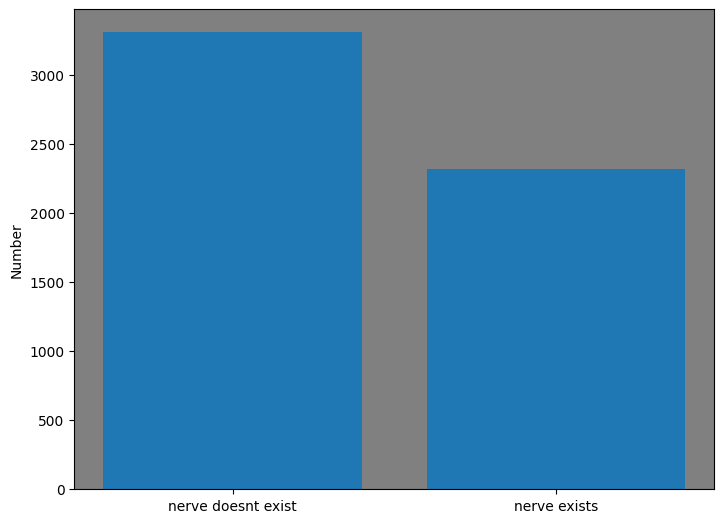

In [ ]:

plot = plt.figure()
ax = plot.add_axes([0,0,1,1])
x = ['nerve doesnt exist', 'nerve exists']
labels = [nerve_doesnt_exist, nerve_exists]
ax.bar(x, labels)
ax.set_facecolor('grey')
plt.ylabel("Number")


Ovaj deo koda definiše funkciju koja koristi modul pickle da serijalizuje i sačuva model u datoteku. Serijalizacija se koristi za pretvaranje objekata u niz bajtova. Metoda služi za praćenje smanjenja validacije i koristi se prethodno dodata biblioteka EarlyStopping.


In [ ]:
def save_checkpoint(self, val_loss, model):
    import pickle
    if self.verbose:
        self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
    with open(self.path, 'wb') as f:
        pickle.dump(model, f)
    self.val_loss_min = val_loss

In [ ]:
EarlyStopping.save_checkpoint = save_checkpoint

Razdvajanje putanji za lakšu manipulaciju nad train i test podacima.


In [ ]:
train_path = 'train'
test_path = 'test'

train_csv_path = 'train_annotation.csv'

 Biblioteka PIL omogućava manipulaciju slikama i rad sa različitim formatima slika u Pythonu. Dobija se pristup svim funkcijama i klasama koje su dostupne unutar Image modula.

In [ ]:
from PIL import Image

Iz train seta se učitava prva slika, zatim se učitava maska koja odgovara toj slici, i na kraju je prikazano gde ta maska na slici pronalazi nerv.

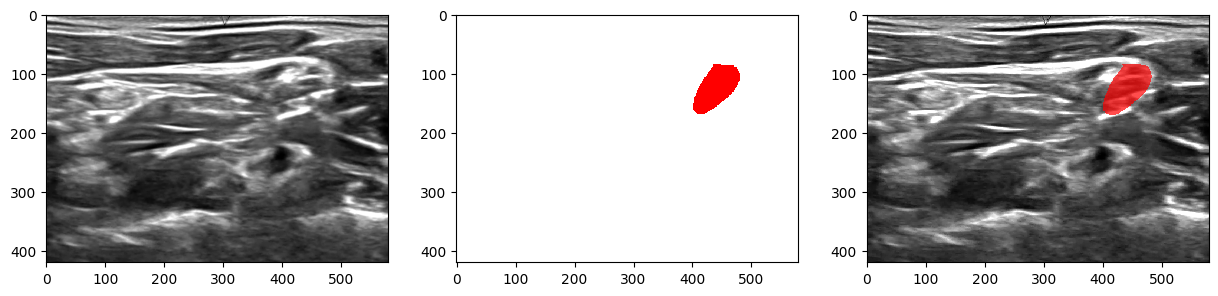

In [ ]:
img1 = np.array(Image.open("train/"+"1_1.tif"))
img1_mask = np.array(Image.open("train/"+"1_1_mask.tif"))
img1_mask = np.ma.masked_where(img1_mask == 0, img1_mask)

fig, ax = plt.subplots(1, 3, figsize = (15, 15))
ax[0].imshow(img1, cmap = "gray")

ax[1].imshow(img1_mask, cmap = "autumn")

ax[2].imshow(img1, cmap = "gray", interpolation = "none")
ax[2].imshow(img1_mask, cmap = "autumn", interpolation = "none", alpha = 0.7)

Definiše se funkcija create_csv koja generiše CSV fajl sa informacijama o slikama i njenim odgovarajućim maskama.


In [ ]:
def create_csv(data_path, out_csv_path, key_word='mask'):
    to_delete = f'_{key_word}'

    for file_name in os.listdir(data_path):
        if key_word in file_name:
            img = file_name.replace(to_delete, '')
            data = pd.DataFrame([img], index=['img']).transpose()
            data.insert(0, 'mask', file_name)

      #  else:
            if not os.path.exists(out_csv_path):
                data.to_csv(out_csv_path, header=True, index=False)
            else:
                data.to_csv(out_csv_path, mode='a', header=False, index=False)

In [ ]:
create_csv(data_path=train_path, out_csv_path=train_csv_path)

ImageDataset predstavlja set podataka u kojem se nalaze učitane ultrazvučne fotografije i njihove maske.

In [ ]:
class ImageDataset(Dataset):
    def __init__(self, df, root_dir, transform=None):
        self.df = df
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        mask = Image.open(os.path.join(self.root_dir, self.df.iloc[idx, 0]))
        image = Image.open(os.path.join(self.root_dir, self.df.iloc[idx, 1]))

        if self.transform:
            return self.transform(image), self.transform(mask)

        return image, mask

In [ ]:
train_df = pd.read_csv(train_csv_path)

In [ ]:
train_df.head(10)
#učitaćemo prvih 10

,mask,img
0,23_74_mask.tif,23_74.tif
1,22_13_mask.tif,22_13.tif
2,8_74_mask.tif,8_74.tif
3,28_67_mask.tif,28_67.tif
4,34_72_mask.tif,34_72.tif
5,22_16_mask.tif,22_16.tif
6,16_42_mask.tif,16_42.tif
7,9_50_mask.tif,9_50.tif
8,34_1_mask.tif,34_1.tif
9,30_24_mask.tif,30_24.tif


In [ ]:
train_samples = ImageDataset(df=train_df, root_dir=train_path)

U sledećam koraku su prikazani primeri ultrazvučnih slika i njihovih maski koji su kreirani u ranijim koracima.
Od učitanih 7 slika, nervi su uočeni na 4 slike.

In [ ]:
def draw_samples(data, n_col, n_row):
    fig = plt.figure(figsize=(20, 5))

    for i in range(1, n_col + 1):
        img_ax = fig.add_subplot(n_row, n_col, i)
        msk_ax = fig.add_subplot(n_row, n_col, i + n_col)

        img_ax.imshow(data[i-1][0], cmap="gray")
        msk_ax.imshow(data[i-1][1], cmap="gray")

    fig.show()

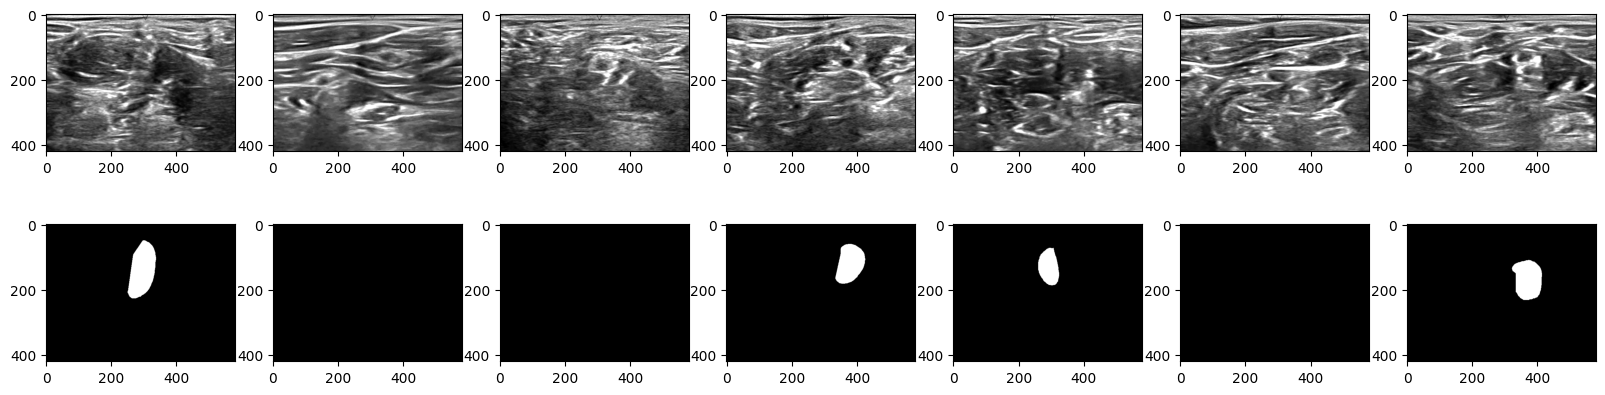

In [ ]:
draw_samples(data=train_samples, n_col = 7, n_row = 2)

# **MODEL**

 Konfiguriše se nekoliko promenljivih koje se koriste prilikom izgradnje i podešavanja modela za obradu slika.


In [ ]:
ENCODER = 'vgg11_bn'
ENCODER_WEIGHTS = 'imagenet'
ACTIVATION = 'sigmoid'
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Koristi se biblioteka segmentation_models_pytorch (smp) kako bi se konstruisao model za semantičku segmentaciju. Definiše se konvolucijska neuronska mreža koja predstavlja model i nad kojom će se vršiti treniranje.


In [ ]:
model = smp.Unet(
    encoder_name=ENCODER,
    encoder_weights=ENCODER_WEIGHTS,
    in_channels=1,
    classes=1,
    activation=ACTIVATION
)

Downloading: "https://download.pytorch.org/models/vgg11_bn-6002323d.pth" to /root/.cache/torch/hub/checkpoints/vgg11_bn-6002323d.pth
100%|██████████| 507M/507M [01:38<00:00, 5.39MB/s]


In [ ]:
import segmentation_models_pytorch.utils as smpu


IoU (Intersection over Union) metrika - evaluaciona mera koja se često koristi u detekciji objekata, i prikazuje tačnost detekcije. U ovom konkretnom primeru, IoU će nam pokazati kako se stvarna maska upoređuje sa predikcijom, odnosno koliko se preklapaju. Da li će model tačno predvidjeti nerv na slici kao što je označeno na maski ili neće. Što je IoU bliži 1, to ukazuje na precizne predikcije i kvalitetan model, dok je IoU bliži 0 to označava slabe performanse modela.

In [ ]:
loss = smpu.losses.DiceLoss()
metrics = [smpu.metrics.IoU()]
optimizer = torch.optim.Adam
scheduler = lr_scheduler.StepLR

In [ ]:
def split_df(df, fraction=0.8):
    df_1 = df.sample(frac=fraction)
    return df_1, df.drop(df_1.index)

In [ ]:
my_transforms = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor()
])

<h2 align="center"><b>TRENIRANJE MODELA</b></h2>

In [ ]:
def train(model, train_df, train_dir, optimizer, loss, metrics,
          learning_rate=0.01, batch_size=20, epochs=10, patience=3,
          scheduler=None, step_size=5, gamma=0.1, device='cpu', transform=None):

    early_stopping = EarlyStopping(patience, path='best_model.pkl', verbose=True)
    optimizer = optimizer(model.parameters(), learning_rate)

    if scheduler:
        scheduler = scheduler(optimizer, step_size, gamma)

    train_epoch = smp.utils.train.TrainEpoch(
        model, loss, metrics, optimizer, device, verbose=True
    )

    valid_epoch = smp.utils.train.ValidEpoch(
        model, loss, metrics, device, verbose=True
    )

    train_logs, valid_logs = [], []

    for epoch in range(epochs):
        train_dataframe, val_dataframe = split_df(train_df)

        train_dataset = ImageDataset(train_dataframe, train_dir, transform=transform)

        valid_dataset = ImageDataset(val_dataframe, train_dir, transform=transform)

        train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                                   batch_size=batch_size,
                                                   shuffle=True)

        valid_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                                   batch_size=batch_size,
                                                   shuffle=False)

        print(f'\nEpoch: {epoch+1}/{epochs}')

        train_log = train_epoch.run(train_loader)
        valid_log = valid_epoch.run(valid_loader)

        train_logs.append(train_log)
        valid_logs.append(valid_log)

        early_stopping(valid_log[loss.__name__], model)

        if early_stopping.early_stop:
            print("Early stopping")
            break

        if scheduler:
            scheduler.step()

    return train_logs, valid_logs

<p align="justify"> U toku 20 epoha se posmatraju i upoređuju različiti parametri. Računa se training loss, validation loss i IoU </p>

In [ ]:
res = train(model=model,
            train_df=train_df,
            train_dir=train_path,
            optimizer=optimizer,
            loss=loss,
            learning_rate=0.01,
            metrics=metrics,
            batch_size=20,
            epochs=20,
            scheduler=scheduler,
            step_size=10,
            patience=3,
            device=DEVICE,
            transform=my_transforms)


Epoch: 1/20
valid: 100%|██████████| 226/226 [00:53<00:00,  4.24it/s, dice_loss - 0.4948, iou_score - 0.3462]
Validation loss decreased (inf --> 0.494777).  Saving model ...

Epoch: 2/20
valid: 100%|██████████| 226/226 [00:53<00:00,  4.25it/s, dice_loss - 0.4571, iou_score - 0.3774]
Validation loss decreased (0.494777 --> 0.457075).  Saving model ...

Epoch: 3/20
valid: 100%|██████████| 226/226 [00:52<00:00,  4.29it/s, dice_loss - 0.5471, iou_score - 0.2959]
EarlyStopping counter: 1 out of 3

Epoch: 4/20
valid: 100%|██████████| 226/226 [00:52<00:00,  4.29it/s, dice_loss - 0.3854, iou_score - 0.4492]
Validation loss decreased (0.457075 --> 0.385383).  Saving model ...

Epoch: 5/20
valid: 100%|██████████| 226/226 [00:53<00:00,  4.24it/s, dice_loss - 0.3604, iou_score - 0.476]
Validation loss decreased (0.385383 --> 0.360438).  Saving model ...

Epoch: 6/20
valid: 100%|██████████| 226/226 [00:52<00:00,  4.28it/s, dice_loss - 0.3852, iou_score - 0.4491]
EarlyStopping counter: 1 out of 3

E

<h2 align="center"><B>PREZENTACIJA DOBIJENIH REZULTATA TRENIRANJA I SEGMENTACIJE<B></h2>




In [ ]:
import pickle

In [ ]:
with open('results.pkl', 'wb') as f:
    pickle.dump(res, f)

In [ ]:
with open('best_model.pkl', 'rb') as f:
    best_model = pickle.load(f)

In [ ]:
train_logs_df = pd.DataFrame(res[0])
valid_logs_df = pd.DataFrame(res[1])

res_dict = {'train': train_logs_df, 'valid': valid_logs_df}

In [ ]:
def draw_graphic(df_dict, title, criteria, xlab, ylab, colors=['y', 'c'],
                 legend_loc='best', figsize=(12, 8), fontsize=14):
    fig = plt.figure(figsize=figsize)
    for i, key in enumerate(df_dict):
        plt.plot(df_dict[key].index.tolist(), df_dict[key][criteria].tolist(), colors[i], lw=3, label=key)
    plt.xlabel(xlab, fontsize=fontsize)
    plt.ylabel(ylab, fontsize=fontsize)
    plt.title(title, fontsize=fontsize)
    plt.legend(loc=legend_loc, fontsize=fontsize)
    plt.grid()

    fig.show()

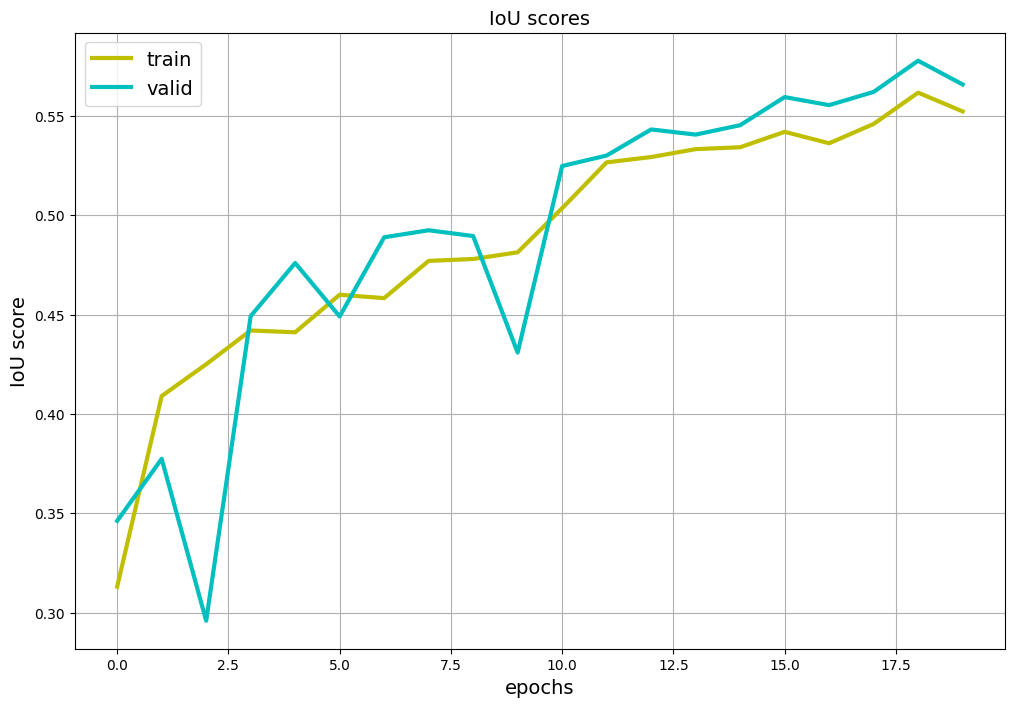

In [ ]:
draw_graphic(df_dict=res_dict, title='IoU scores', criteria='iou_score', xlab='epochs', ylab='IoU score')

Training i validation loss su u velikoj meri približnih vrednosti.

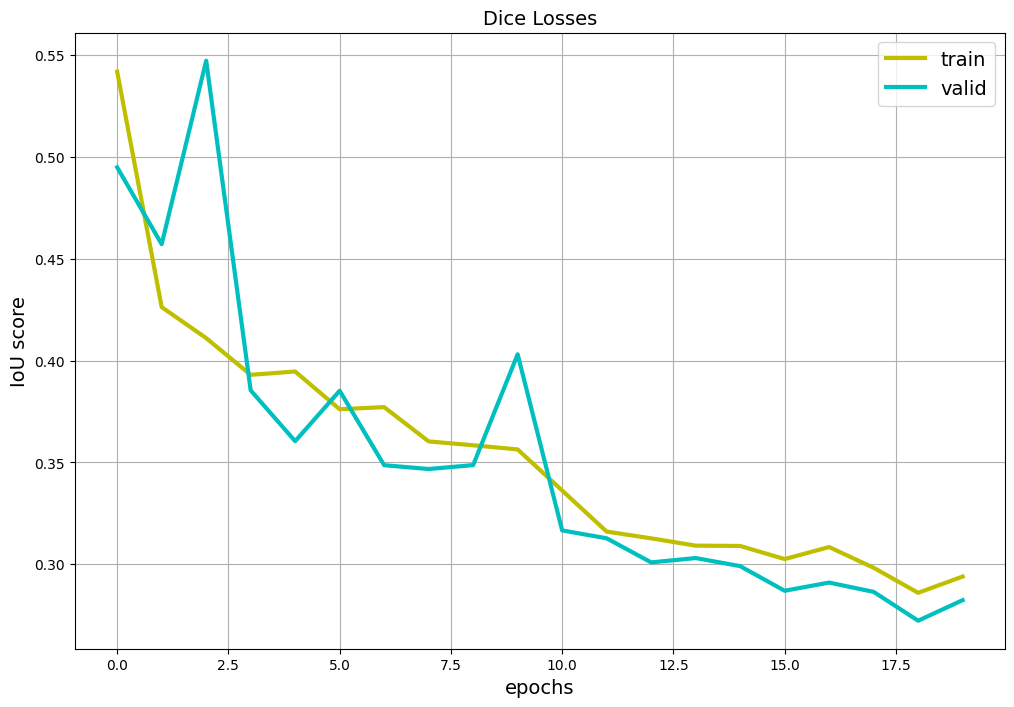

In [ ]:
draw_graphic(df_dict=res_dict, title='Dice Losses', criteria='dice_loss', xlab='epochs', ylab='IoU score')

<h2 align="center"><b> Rad nad testnim podacima </b></h2>

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
def rle_encoding(x):
    dots = np.where(x.T.flatten()==1)[0]
    run_lengths = []
    prev = -2
    for b in dots:
        if (b>prev+1): run_lengths.extend((b+1, 0))
        run_lengths[-1] += 1
        prev = b
    return run_lengths

In [ ]:
imgs = [f for f in os.listdir(test_path)]
imgs = sorted(imgs, key=lambda s: int(s.split('.')[0]))

Kreira se novi CSV fajl u kojem se nalaze podaci o tome da li fotografije sadrže nerve ili ne. Sve te informacije se gledaju u odnosu na model za trening.

In [ ]:
def create_csv_submission(model, data_path, img_list, out_path):
    submission_df = pd.DataFrame(columns=['img', 'pixels'])
    model.to(DEVICE)
    model.eval()

    for i, img in enumerate(tqdm(img_list)):
        x = Image.open(os.path.join(data_path, img))

        x = my_transforms(x)

        x = x.unsqueeze(0).to(DEVICE)
        pred_mask = model.predict(x)

        pred_mask = pred_mask.cpu()
        pred_mask = transforms.Resize(size=(420, 580))(pred_mask)

        encoding = rle_encoding(pred_mask)

        pixels = ' '.join(map(str, encoding))
        submission_df.loc[i] = [str(i+1), pixels]

    submission_df.to_csv(out_path, index=False)

In [ ]:
create_csv_submission(model=model,
                      data_path=test_path,
                      img_list=imgs,
                      out_path='submission.csv')

  0%|          | 0/5508 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to

In [ ]:
test_res = pd.read_csv("submission.csv")

In [ ]:
test_res.head(20)

,img,pixels
0,1,105967 13 106387 13 106805 16 107218 28 107638...
1,2,108542 25 108962 25 109374 57 109794 57 110212...
2,3,111421 22 111841 22 112260 25 112678 31 113097...
3,4,NaN
4,5,106008 10 106428 10 106846 13 107257 35 107677...
5,6,NaN
6,7,NaN
7,8,NaN
8,9,100561 17 100968 52 101387 55 101799 78 102218...
9,10,NaN
